# Exploratory Data Analysis with Python

# #  Step 0 Imports Libraries and Data

In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns # for exploratory plots
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)  #to view the full columns, useful if you have several columns

import warnings

warnings.filterwarnings("ignore", category=FutureWarning) # To hide certain warnings


#### Load the Data

In [70]:
df = pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')


# Step 1: Understanding The Data
* Dataframe shape
* Head and Tail
* Datatypes
* Describe and values

In [5]:
df.shape

(1087, 56)

#### To View The Top 5 rows of the data

In [6]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


#### To View The Bottom 5 rows of the data

In [7]:
df.tail()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2022,NaN,NaN,Steel,2016-06-16,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,112 ft (34 m),0.0,Vertical chain lift hill,NaN,Single car trains with riders arranged 4 acros...,Jungle X-Pedition,0:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Crypt,NaN,NaN,NaN,NaN,NaN,NaN,Official website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,131 ft (40 m),3.0,Chain lift hill,NaN,NaN,DC Universe,NaN,NaN,NaN,NaN,87°,127 ft (39 m),NaN,NaN,Green Lantern: First Flight Tidal Wave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,2022-01-01,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


#### To view all columns of the data
##### Subseting Data

In [8]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

#### To view the Data Type

In [10]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

#### To view Some Basic Statistics of the Data

In [11]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preparation
* Subsetting / Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

#### Subsetting (with .copy())

In [72]:
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
#     'Opening date',
#        'Type', 
    'Manufacturer', 
#     'Height restriction', 
#     'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date', 
#     'Opened', 
#     'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
    'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
#     'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
#     'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [73]:
df.shape

(1087, 13)

#### Dropping columns

In [65]:
# df.drop(['opening_date_clean'], axis = 1)

In [17]:
df.drop(['status'], axis =1)

##### We notice that Opening_date_clean is an object datatype, but it should be a datetype

In [76]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
#bdf['year_introduced'] = pd.to_numeric(df['year_introduced'])

In [77]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

#### Renaming Columns

In [78]:
# Renaming columns
df = df.rename(columns = {'coaster_name': 'Coaster_Name',
                    'year_introduced': 'Year_Introduced',
                    'latitude': 'Latitude',
                    'longitude': 'Longitude',
                    'opening_date_clean': 'Opening_Date',
                    'speed_mph': 'Speed_mph',
                    'height_ft': 'Height_ft',
                    'Inversions_clean': 'Inversions'})

In [79]:
# Inspect the data to see the changes

df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


#### IS NULL (ISNA)

In [80]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce_clean       725
dtype: int64

#### Duplicate Data

In [31]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce_clean


In [32]:
# Checking for duplicates in a subset (columns)
df.loc[df.duplicated(subset= ['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


#### Taking Subsets a bit further

The values in the rows look similar except for the 'Year_Introduced' column where they are different. Therefore, this prompt an investigation. Were they coasters that existed, which were removed and later added or something else. This has to be determined...


In [33]:
# checking for subsets using row context
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


#### Now we look at multiple columns were the values are duplicates

In [82]:
df = df.loc[~df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date'])]\
.reset_index(drop = True).copy()

# ~df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date']). This makes it
# possible to extract inverse of these columns 
# drop = true drops the autogenerated index column

In [83]:
df.shape

(990, 13)

# Step 3: Feature Understanding

We are done cleaning our data, and have a good understanding of where missing values occur. The next step is to understand the distribution of the data and where potential outliers occur. To achieve this we do the following:

- Univariate Analysis
* Plotting Feature Distributions
    * Histogram
    * KDE
    * Boxplot


In [39]:
# We can consider the year_introduced

df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Counts')

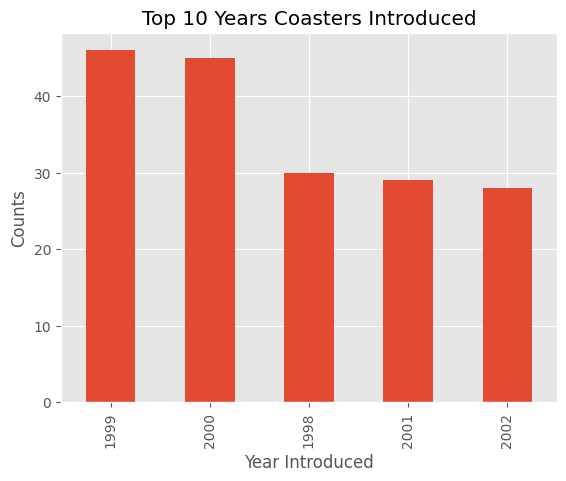

In [48]:
ax = df['Year_Introduced'].value_counts() \
.head(10) \
.plot(kind='bar', title = 'Top 10 Years Coasters Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Counts')

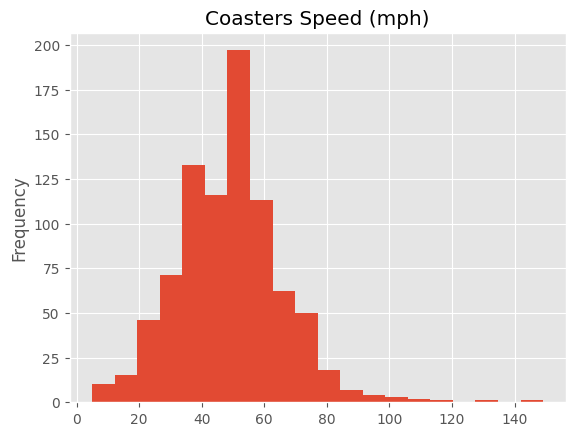

In [52]:
# Alternatively you can use a Histogram to examine the data

ax = df['Speed_mph'].plot(kind = 'hist',
                    bins = 20,
                    title = 'Coasters Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

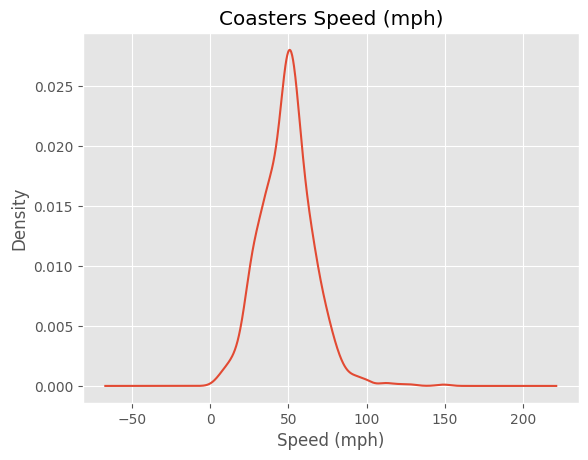

In [54]:
# Alternatively you can use a Histogram to examine the data

ax = df['Speed_mph'].plot(kind = 'kde',
                    title = 'Coasters Speed (mph)')
ax.set_xlabel('Speed (mph)')

# Step 4: Feature Relationship

We have looked at each feature individually, now we look at how they relate with each other. To achieve that, we use:

* Scatterplots
* Heatmap Correlation
* Pairplot
* Groupby Comparisons

#### Scatterplots

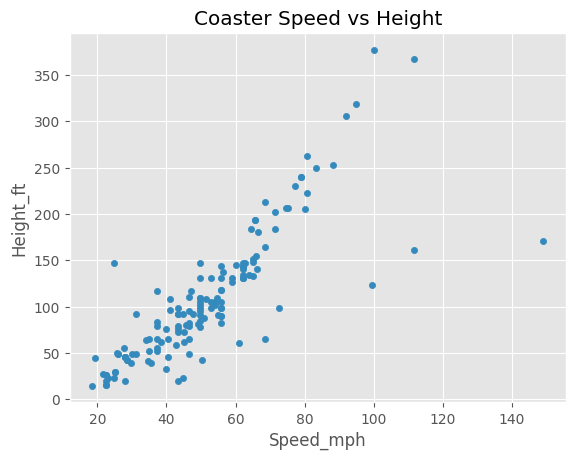

In [58]:
df.plot(kind ='scatter', 
        x = 'Speed_mph',
       y = 'Height_ft',
       title = 'Coaster Speed vs Height')
plt.show() # removes extra plot info and keep plot clean

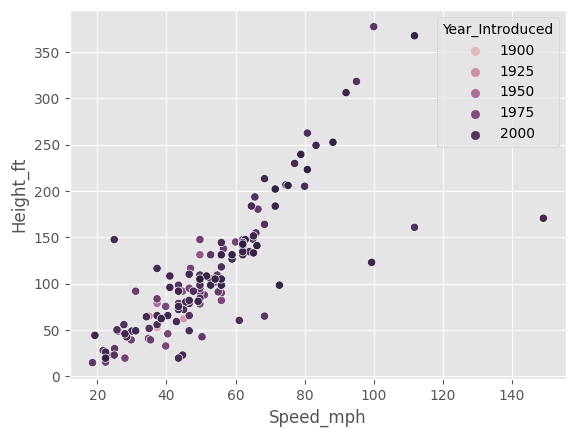

In [62]:
# Using Seaborn

sns.scatterplot(x = 'Speed_mph',
                y = 'Height_ft',
                hue = 'Year_Introduced',
                data =df)
plt.show()

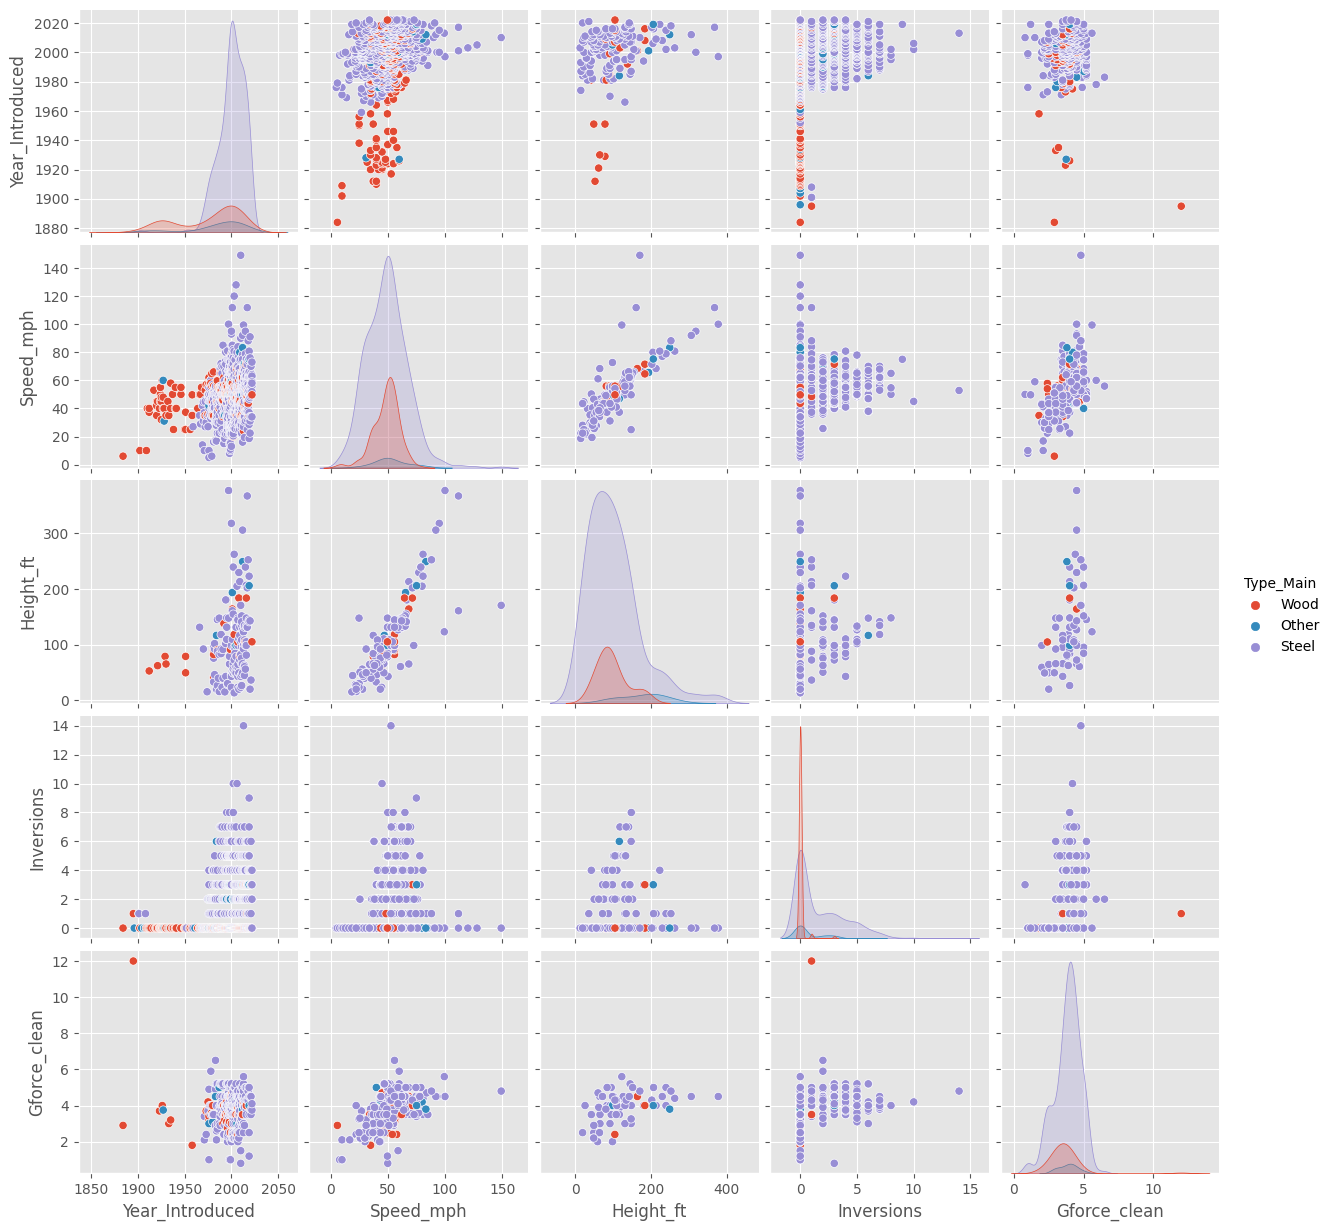

In [89]:
# We can also use pairplots, which enable us to introduce multiple x and y variables

sns.pairplot(df,vars=['Year_Introduced', 'Speed_mph',
                      'Height_ft','Inversions', 'Gforce_clean'],
             hue = 'Type_Main')
plt.show()

#### Heatmap Correlations

In [93]:
# Drop null values and run correlation analysis

df_corr = df[['Year_Introduced', 'Speed_mph',
                      'Height_ft','Inversions', 'Gforce_clean']].dropna().corr()

<Axes: >

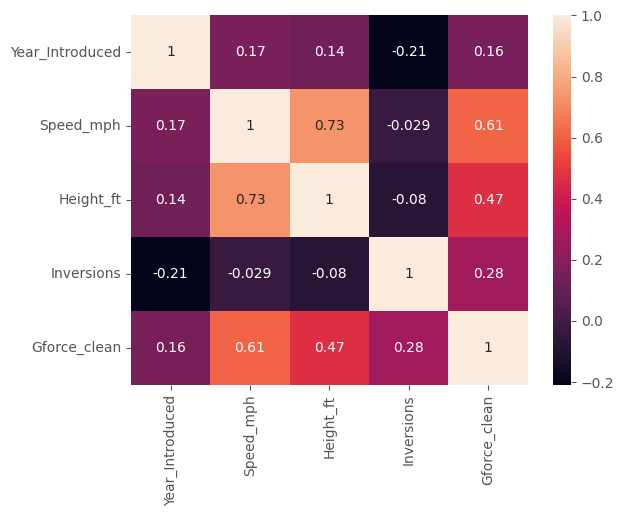

In [94]:
# Heatmap

sns.heatmap(df_corr, annot = True)

# Step 5: Ask Questions About The 

- Try to answer questions you have about the data using a plot or statistics

* What are the locations of the fastest roller coasters (minimum of 10)

In [97]:
df['Location'].value_counts()

Location
Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: count, Length: 280, dtype: int64

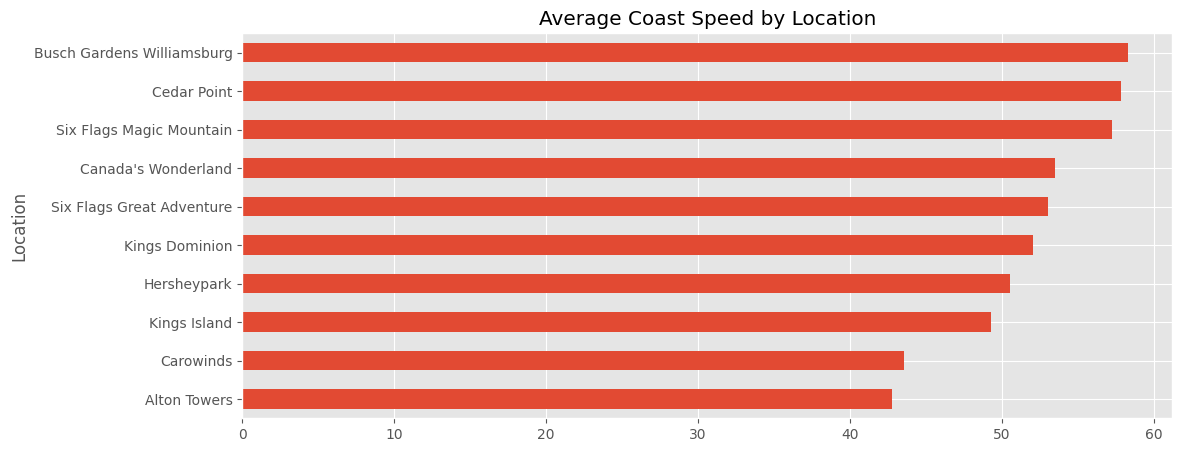

In [105]:
ax = df.query('Location != "Other"') \
.groupby('Location')['Speed_mph'] \
.agg(['mean', 'count']) \
.query('count >= 10') \
.sort_values('mean')[ 'mean'] \
.plot(kind = 'barh', figsize = (12, 5),title = 'Average Coast Speed by Location')
ax.set_xlabel('Average Coast Speed')
plt.show()